<a href="https://colab.research.google.com/github/PAndersonSB/Projeto-1-Datascience/blob/main/Data_Science_Projeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fonte

https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# Problema

A empresa automobilística chinesa Geely Auto aspira a entrar no mercado dos EUA estabelecendo sua unidade de fabricação lá e produzindo carros localmente para competir com seus colegas americanos e europeus.

Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam os preços dos carros no mercado americano, pois podem ser muito diferentes do mercado chinês. A empresa quer saber:

Quais variáveis são significativas na previsão do preço de um carro
Quão bem essas variáveis descrevem o preço de um carro
Com base em várias pesquisas de mercado, a empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros em todo o mercado americano.

#Objetivo de Negócios

Somos obrigados a modelar o preço dos carros com as variáveis independentes disponíveis. Ele será usado pela administração para entender exatamente como os preços variam com as variáveis independentes. Eles podem manipular o design dos carros, a estratégia de negócios etc. para atender a determinados níveis de preços. Além disso, o modelo será uma boa maneira de a administração entender a dinâmica de preços de um novo mercado.

#Conhecendo os dados

importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
pasta = "/content/drive/My Drive/Colab Notebooks/Projeto 1/"
nome_arquivo_dados = "CarPrice_Assignment.csv"
dados = pd.read_csv(pasta + nome_arquivo_dados ,delimiter=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dados.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


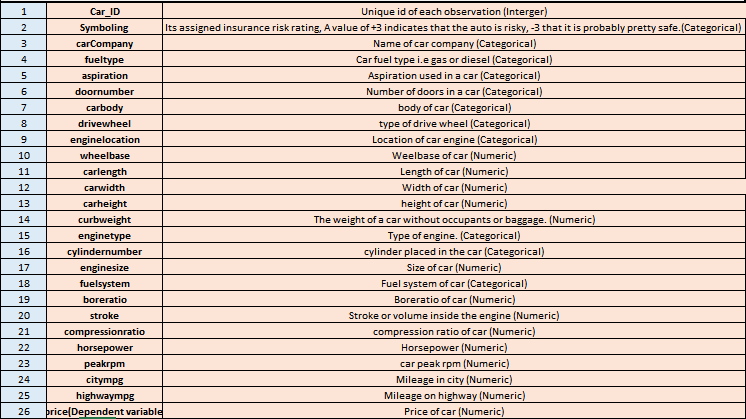

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

nenhum valor nulo em todas as colunas

In [ ]:
dados.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

tipos de dados no dataset : inteiro , real e objeto(texto)

In [ ]:
dados.shape

(205, 26)

205 linhas e 26 colunas

In [ ]:
dados.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
for c in list(dados.columns): #todas as colunas
  print(c)
  print(dados[c].unique())
  print('\n')

car_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]


symboling
[ 3  1  2  0 -1 -2]


CarName
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 50

In [ ]:
colunas = [ 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

In [ ]:
for c in list(colunas): #apenas colunas selecionadas ↥ lista de colunas acima ↥
  print(c)
  print(dados[c].unique())
  print('\n')

In [ ]:
print('preco minimo' ,dados['price'].min() )
print('preco maximo', dados['price'].max())

preco minimo 5118.0
preco maximo 45400.0


#Estatistica descritiva

##distribuição de frequencia

In [ ]:
def distruibuicao_de_frequencia(coluna):
  frequencia = dados[coluna].value_counts()
  percentual = dados[coluna].value_counts(normalize = True) * 100
  df = pd.DataFrame({'Frequencia':frequencia , 'Percentual (%)':percentual.round(2)})
  df.rename_axis(str(coluna) , axis = 1, inplace = True)

  return df

In [ ]:
def distruibuicao_crosstab(coluna1 , coluna2):
  df = pd.crosstab(dados[coluna1], dados[coluna2] )
  return df

In [ ]:
def distruibuicao_crosstab2(coluna1 , coluna2, coluna3):
  df = pd.crosstab(dados[coluna1],
                   dados[coluna2],
                   aggfunc = 'mean' , #media
                   values = dados[coluna3] )  #costuma ser a variavel dependente ex: preço
  return df

###variaveis qualitativas

funções para diminuir a repetição de codigo

In [ ]:
df = distruibuicao_de_frequencia('aspiration')
df

aspiration,Frequencia,Percentual (%)
std,168,81.95
turbo,37,18.05


A quantidade de carros turbo é bem menor que o de carros std

In [ ]:
df = distruibuicao_de_frequencia('fueltype')
df

fueltype,Frequencia,Percentual (%)
gas,185,90.24
diesel,20,9.76


A quantidade de carros a diesel é bem menor que o de carros a gasolina

In [ ]:
df = distruibuicao_crosstab('aspiration', 'fueltype')
df

fueltype,diesel,gas
aspiration,,
std,7,161
turbo,13,24


mesmo a quantidade de carros std sendo maior que a turbo , a quatidade de carros std que usa combustivel diesel é menor que o de carros turbo com combustivel diesel.

In [ ]:
df= distruibuicao_crosstab2('aspiration', 'fueltype' , 'price')
df

fueltype,diesel,gas
aspiration,,
std,9670.571429,12739.127329
turbo,19159.153846,14748.465292


a média do preço dos carros.

enquanto a combinação turbo/diesel tem valor maior que turbo/gas

a combinação std/diesel tem valor menor que std/gas.

###variaveis quantitativas

distruibuindo os valores em classes 

## Medidas de tendencia central

#Machine learning.

##tratando dados

In [ ]:
dados.iloc[:, [2 ,3, 4, 5 ,6 ,7 ,8 ,14 ,15 ,17]]

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
dict = {'gas': 1, 'diesel': 2}
dados['fueltype'] = dados['fueltype'].map(dict)

In [ ]:
dict = {'std': 1, 'turbo': 2}
dados['aspiration'] = dados['aspiration'].map(dict)

In [ ]:
dict = {'two': 2, 'four': 4}
dados['doornumber'] = dados['doornumber'].map(dict)

In [ ]:
dict = {'convertible': 1, 'hatchback': 2 ,'sedan': 3,'wagon': 4,'hardtop': 5}
dados['carbody'] = dados['carbody'].map(dict)

In [ ]:
dict = {'rwd': 1, 'fwd': 2 ,'4wd': 3}
dados['drivewheel'] = dados['drivewheel'].map(dict)

In [ ]:
dict = {'front': 1, 'rear': 2}
dados['enginelocation'] = dados['enginelocation'].map(dict)

In [ ]:
dict = {'dohc': 1, 'ohcv': 2 ,'ohc': 3,'l': 4,'rotor': 5 ,'ohcf':6 ,'dohcv':7}
dados['enginetype'] = dados['enginetype'].map(dict)

In [ ]:
dict = {'four': 4, 'six': 6 ,'five': 5,'three': 3,'twelve': 12 ,'two':2 ,'eight':8}
dados['cylindernumber'] = dados['cylindernumber'].map(dict)

In [ ]:
dict = {'mpfi': 1, '2bbl': 2 ,'mfi': 3,'1bbl': 4,'spfi': 5 ,'4bbl':6 ,'idi':7 ,'spdi':8}
dados['fuelsystem'] = dados['fuelsystem'].map(dict)

##correlação e escolhendo colunas

In [ ]:
correlacao = dados.corr()

In [ ]:
dados.head()

In [ ]:
correlacao.price

car_ID             -0.109093
symboling          -0.079978
fueltype            0.105679
aspiration          0.177926
doornumber          0.031835
carbody             0.161294
drivewheel         -0.577992
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype         -0.092841
cylindernumber      0.718305
enginesize          0.874145
fuelsystem         -0.122118
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [ ]:
#0,69  0,8  0,8  0,71 0,8 0.7 0,68 0.5
X = dados[['highwaympg' ,'horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ,'carwidth' ,'carlength' ,'wheelbase']]
y = dados['price']

In [ ]:
# X  0,8  0,8 0,71 0,8 X X X
X = dados[['horsepower' ,'enginesize' , 'cylindernumber' ,'curbweight' ]]
y = dados['price']

##regressao

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_[0])
print("Intercept: \n", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 52.27104581509909
Intercept: 
 -13669.93725967238
Mean squared error: 13843283.08
Coefficient of determination: 0.79


##grafico

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(go.Scatter(x=dados['price'].index , y=dados['price'].values , name='Dados Reais',mode='markers'))
fig.add_trace(go.Scatter(x=dados['price'].index , y=regr.predict(X).reshape(1,-1)[0], name='Regressão Linear'))

fig.show()

**CARACA QUE MANEIRO**